## ⋰ **Decision Tree Classifier** ⋱

Neste documento, estou utilizando a base de dados `'../database/risco_credito.csv'` para gerar uma árvore de decisão baseada no critério de entropia. Além disso, fiz anotações pertinentes que me ajudarão a recordar as bibliotecas, módulos e funções que utilizei no decorrer da análise de dados.

### 📍 **Importação de Bibliotecas e Módulos**

In [ ]:
%pip -q install plotly --upgrade

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_credit_risk = pd.read_csv('../database/risco_credito.csv', encoding='ISO-8859-1')

### 📍 **Visualização de Dados**

In [3]:
df_credit_risk

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


### 📍 **Divisão das Variáveis**

In [5]:
X_credit_risk = df_credit_risk.iloc[:, 0:4].values
X_credit_risk

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [6]:
y_credit_risk = df_credit_risk.iloc[:, 4].values
y_credit_risk

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

### 📍 **Tratamento de Dados**

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
categorical_columns = [0, 1, 2, 3]
label_encoders = {}

for column in categorical_columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(X_credit_risk[:, column])
    X_credit_risk[:, column] = label_encoder.fit_transform(X_credit_risk[:, column])
    label_encoders[column] = label_encoder

In [9]:
X_credit_risk

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

### 📍 **Salvando Variáveis no formato pkl**

In [10]:
import pickle
with open('risco_credito.pkl', mode = 'wb') as f:
    pickle.dump([X_credit_risk, y_credit_risk], f)

### 📍 **Decision Tree Classifier**

In [4]:
from sklearn.tree import DecisionTreeClassifier

Importando a classe `DecisionTreeClassifier` do módulo `sklearn.tree`. A `DecisionTreeClassifier` é uma classe que implementa um classificador de árvore de decisão. Ela possui vários parâmetros que podem ser ajustados para controlar o comportamento do modelo, como o critério usado para medir a qualidade de uma divisão, a estratégia usada para escolher a divisão em cada nó e a profundidade máxima da árvore.

In [19]:
import pickle
with open('../database/risco_credito.pkl', 'rb') as f:
    X_credit_risk, y_credit_risk = pickle.load(f)

In [20]:
X_credit_risk

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [21]:
y_credit_risk

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [29]:
tree_credit_risk = DecisionTreeClassifier(criterion='entropy')
tree_credit_risk.fit(X_credit_risk, y_credit_risk)

DecisionTreeClassifier(criterion='entropy')

Aqui estou criando e treinando um modelo de árvore de decisão para classificação usando a biblioteca `scikit-learn`. O parâmetro `criterion='entropy'` indica que o modelo deve usar a entropia como medida de qualidade para dividir os nós da árvore. A entropia é uma medida da impureza de um conjunto de dados e é usada para determinar como dividir os dados em cada nó da árvore para obter a melhor separação das classes. O método `fit` ajusta o modelo aos dados fornecidos, construindo a árvore de decisão.

In [30]:
tree_credit_risk.feature_importances_

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

Retornando a importância de Gini dos recursos.

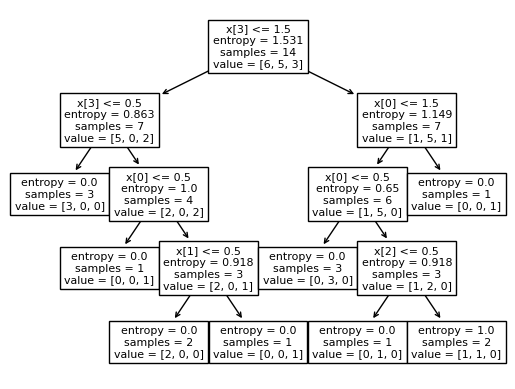

In [42]:
from sklearn import tree
tree.plot_tree(tree_credit_risk);

Usando a função `plot_tree` do módulo `tree` da biblioteca `scikit-learn` para criar uma visualização de uma árvore de decisão.

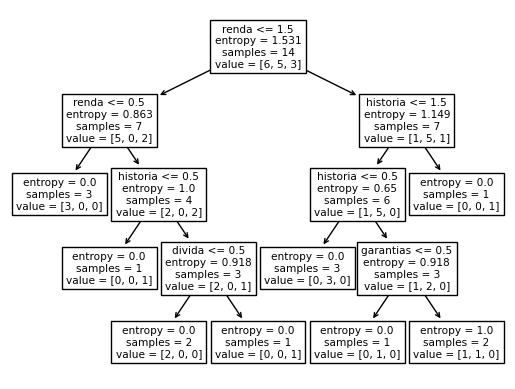

In [43]:
predictor = ['historia', 'divida', 'garantias', 'renda']
tree.plot_tree(tree_credit_risk, feature_names=predictor);

O parâmetro `feature_names=predictor` indica que a função deve usar os nomes de recursos armazenados na variável predictor para rotular os nós da árvore.

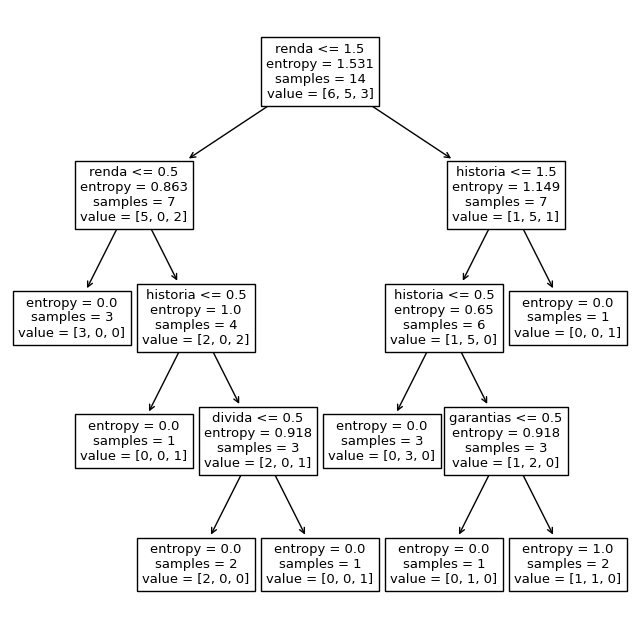

In [46]:
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
tree.plot_tree(tree_credit_risk, feature_names=predictor);

Em `figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))` estou criando uma nova figura e um conjunto de eixos usando a função `subplots` da biblioteca `matplotlib`. O parâmetro `nrows=1, ncols=1` indica que a figura deve ter apenas um conjunto de eixos. O parâmetro `figsize=(8, 8)` define o tamanho da figura em polegadas.

In [47]:
tree_credit_risk.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

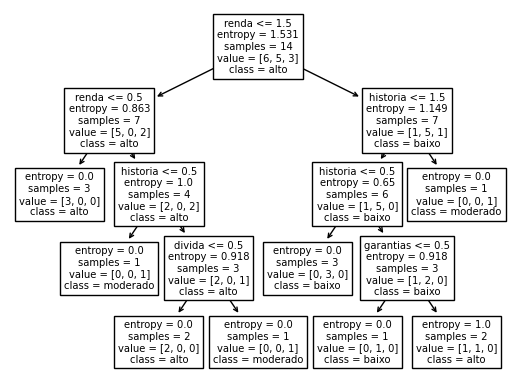

In [48]:
tree.plot_tree(tree_credit_risk, feature_names=predictor, class_names=list(tree_credit_risk.classes_));

O parâmetro `class_names=list(tree_credit_risk.classes_)` indica que a função deve usar os nomes das classes armazenados na variável `tree_credit_risk.classes_` (convertidos em uma lista) para rotular as folhas da árvore.

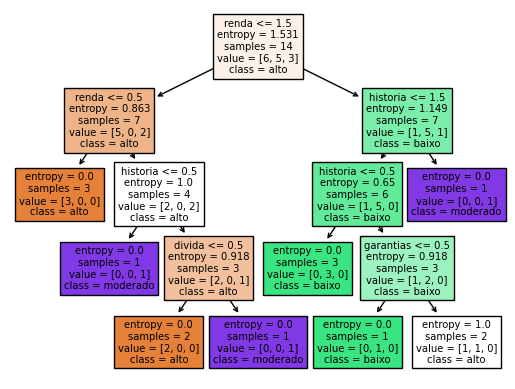

In [41]:
tree.plot_tree(tree_credit_risk, feature_names=predictor, class_names=list(tree_credit_risk.classes_), filled=True);

O parâmetro `filled=True` indica que os nós devem ser coloridos para indicar a classe majoritária para classificação.